# Inhibitor Diffusion and Germination - Effect of Spore Density

## Numerical experiments - Week 03/2025

_Boyan Mihaylov, MSc Computational Science (UVA/VU)_

## Prerequisite libraries

In [1]:
import numpy as np
from importlib import reload
import setup as st
import diffusion as df
import conversions as conv
import plotting as pt

d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:39: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_xlabel('$x$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:40: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_ylabel('$y$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:44: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_zlabel('$z$ [$\mu$m]')


## 1. Functional relationship between spore density and saturation

The previous notebook explored spore densities consistent with experimental setups where density-induced inhibition was observed. While the numerical experiments did not indicate an effect of spore density in a regular grid-like 3D distribution, an open question remains at which densities a local saturation becomes noticeable. To establish a functional relationship between the spore density and the inhibitor concentration at the spore at 4 hours, multiple simulations need to be performed with varying periodic lattice sizes, indicative of different spore grid densities.

The bottom limit of the density range is set at $3\times10^4$ spores/mL - an value just below the previously observed densities. The upper extreme is set at a configuration where the spore only has a single layer of free lattice sites around it. This corresponds to a lattice edge length of $L=3\times 5\mu\text{m}=15\mu\text{m}$ and a volume $V=3.375\times 10^{-9}$ mL, corresponding to a spore density of approximately $2.96\times 10^{8}$ spores/mL. This is rounded to $3\times 10^{8}$ spores/mL.

[3.00000000e+04 9.48683298e+04 3.00000000e+05 9.48683298e+05
 3.00000000e+06 9.48683298e+06 3.00000000e+07 9.48683298e+07
 3.00000000e+08]
Populating uniform 3D spore grid
Conversion: 3.00000000000000E-8 micrometers^-3
Effective density: 2.999999892949745e-08 spores/micrometer^3
Populating volume of 262144000 micrometers^3 with 7.86431971937418 spores, 1 spores per dimension
Spore spacing: 640.0 micrometers
Conversion: 9.48683298050514E-8 micrometers^-3
Effective density: 9.48683265278305e-08 spores/micrometer^3
Populating volume of 262144000 micrometers^3 with 24.8691625893116 spores, 2 spores per dimension
Spore spacing: 320.0 micrometers
Conversion: 3.00000000000000E-7 micrometers^-3
Effective density: 3.000000106112566e-07 spores/micrometer^3
Populating volume of 262144000 micrometers^3 with 78.64320278167725 spores, 4 spores per dimension
Spore spacing: 160.0 micrometers
Conversion: 9.48683298050514E-7 micrometers^-3
Effective density: 9.486832937000145e-07 spores/micrometer^3
Pop

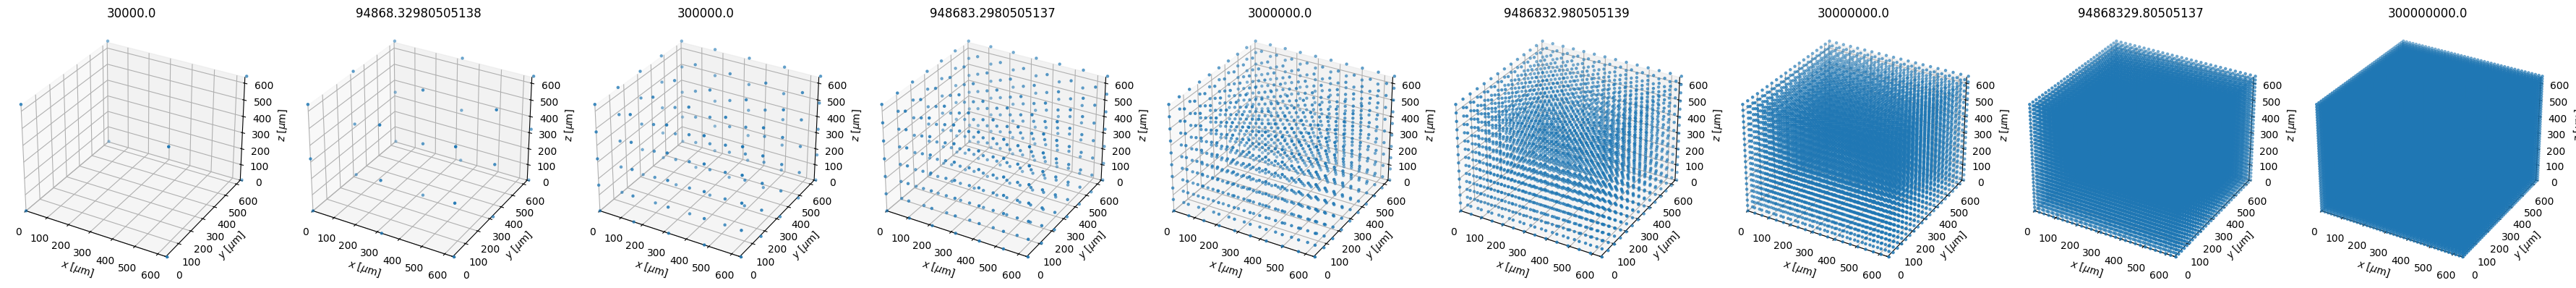

In [82]:
spore_densities = 3 * 10 ** np.arange(4, 8.5, 0.5)
print(spore_densities)

N = 127
dx = 5

# Uniform spore grid
print("Populating uniform 3D spore grid")
spore_coords_all = []
spore_spacing_all = []

for spore_density in spore_densities:
    spore_density = conv.inverse_mL_to_micrometers_cubed(spore_density)
    spore_coords, spore_spacing = st.populate_spore_grid_coords(N, dx, spore_density)
    spore_coords_all.append(spore_coords)
    spore_spacing_all.append(spore_spacing)

pt.plot_spore_positions(np.full(len(spore_coords_all), N), np.full(len(spore_coords_all), N), spore_coords_all, dx,
                        titles=spore_densities)

The diffusion procedure is then run with at all spore densities until $t_{\textrm{max}}=4 \textrm{h}$.

In [84]:
# Use fitted permeation coefficient
Ps_fit = 0.0002675353069511818 # microns/s

# Cell wall and spore parameters
V_spore = 125 # microns^3
V_cell_wall = 19.5 # microns^3
c_spore = 1.018 # M
c_cell_wall = 1.018 # M

# General simulation parameters
t_max = 14400 # seconds
dt = 0.005
dx = 5 # microns
n_save_frames = 100
c_thresh_factors = 10.0**(-np.arange(1, 7))

# Define experiment parameters
global_id = 'ms_250115'
exp_params = []
title_base = 'spores/mL,\nspore spacing: '
for density in spore_densities:
    label = str(np.format_float_scientific(np.round(spore_densities[3], 1))) + title_base + f'{round(spore_spacing_all[3])} $\mu$m'
    exp_params.append({'expID': global_id, 'simID': f'D{density}', 'label': label, 'dims': 3,
                       'D': None, 'Ps': Ps_fit, 'c0': c_cell_wall, 'spore_density': density})

# Run simulations
st.run_diffusion_experiments_multi_spore(exp_params, t_max, dt, dx, n_save_frames, V_spore, c_thresh_factors)

Conversion: 3.00000000000000E-8 micrometers^-3
D30000.0: Running simulation 9.486833e+05spores/mL,
spore spacing: 107 $\mu$m on lattice with size 517
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 2880000 steps on a lattice of size [2590 2590 2590] microns.


<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
C:\Users\mihbo\AppData\Local\Temp\ipykernel_22712\2809507785.py:22: SyntaxWarning: invalid escape sequence '\m'
  label = str(np.format_float_scientific(np.round(spore_densities[3], 1))) + title_base + f'{round(spore_spacing_all[3])} $\mu$m'


MemoryError: Unable to allocate 105. GiB for an array with shape (101, 518, 518, 518) and data type float64

In [76]:
reload(conv)
reload(pt)

d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:39: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_xlabel('$x$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:40: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_ylabel('$y$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:44: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_zlabel('$z$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:271: SyntaxWarning: invalid escape sequence '\m'
  ax[0].set_xlabel('Spore density [$1/\mu m^3$]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:281: SyntaxWarning: invalid escape sequence '\m'
  ax[1].set_xlabel('Spore distance [$\mu m$]')


<module 'plotting' from 'd:\\MSc Computational Science\\Master Thesis\\msc-thesis\\Code\\plotting.py'>

Plotting simulation D300000.0: 300000.0 spores/mL
Plotting simulation D948683.2980505137: 948683.2980505137 spores/mL
Plotting simulation D3000000.0: 3000000.0 spores/mL
Plotting simulation D9486832.980505139: 9486832.980505139 spores/mL
Plotting simulation D30000000.0: 30000000.0 spores/mL
Plotting simulation D94868329.80505137: 94868329.80505137 spores/mL
Plotting simulation D300000000.0: 300000000.0 spores/mL


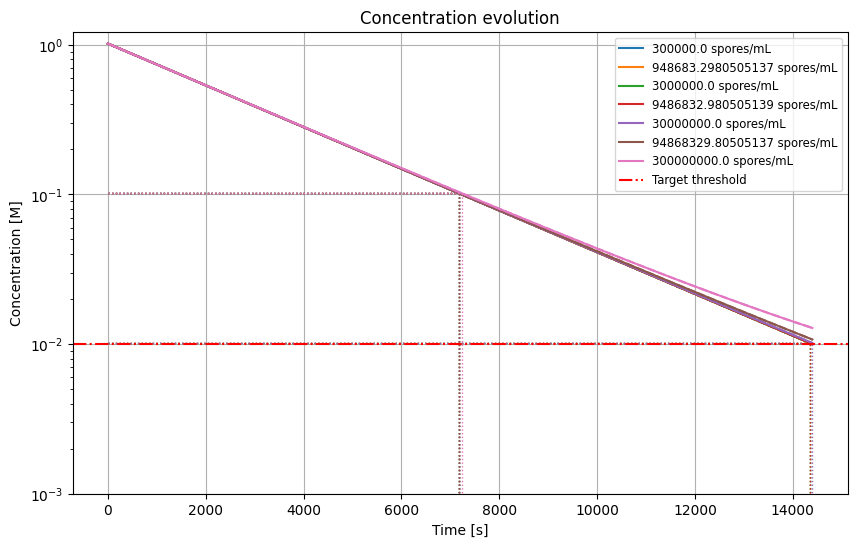

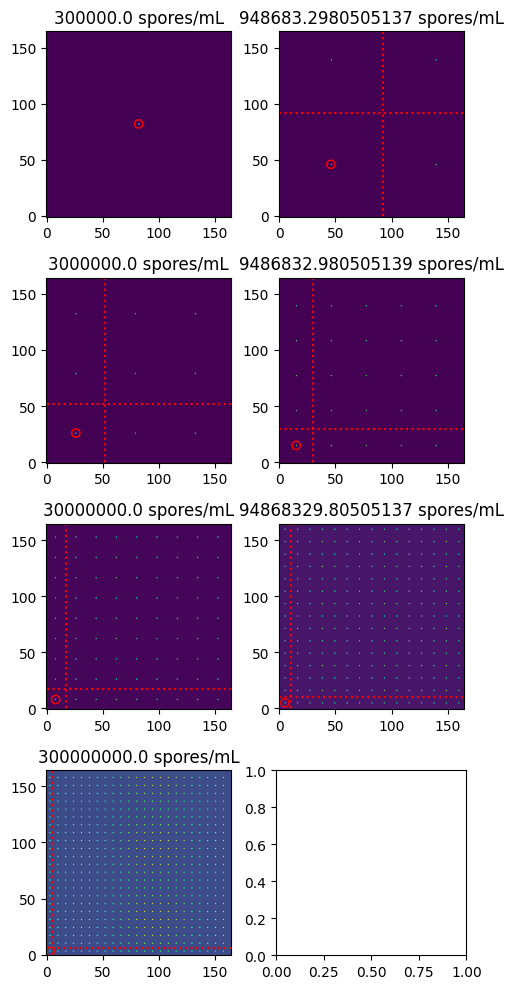

Conversion: 1780.89434287781 mL^-1
Conversion: 9945.83250969408 mL^-1
Conversion: 53735.6341140673 mL^-1
Conversion: 268537.477761740 mL^-1
Conversion: 1371742.11248285 mL^-1
Conversion: 6010518.40721262 mL^-1
Conversion: 23323615.1603499 mL^-1
Linear fit: y = 1.2025925520681087e-10x + 0.009999979185186235


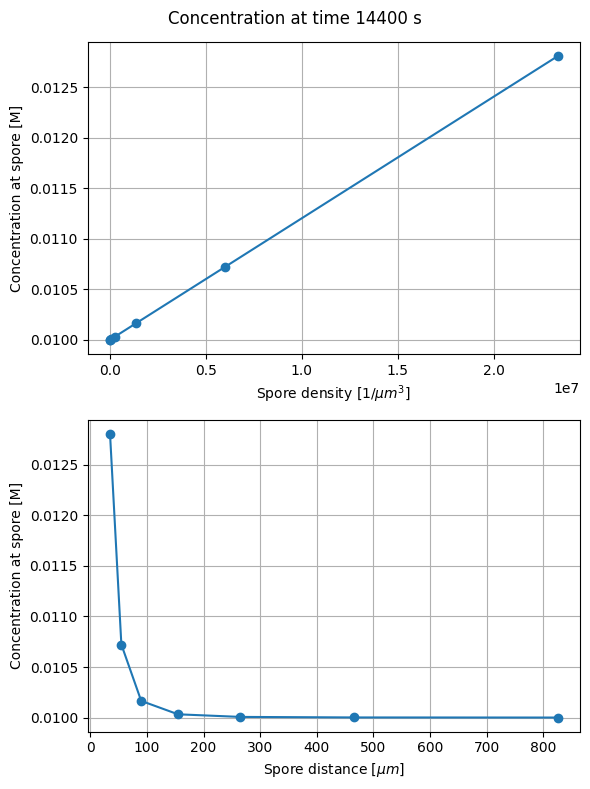

In [79]:
global_id = 'ms_250115'
t_max = 14400
pt.plot_periodic_experiment_results(global_id, logy=True, target_thresh=0.01, mark_spore=True)
pt.plot_densities_vs_concentrations_at_time(global_id, t_max, lin_fit=True)

## 3. Diffusion between spores at the bottom of the medium

A heterogeneous densification occurs naturally when spores sink to the bottom of the medium due to gravity. In a typical experimental setup [1] the time until spores sink to the bottom of a well filled with $150 \mu\textrm{L}$ medium (from which a medium depth of 3.9 mm is calculated) is about 1 hours. This is a significant period overlapping with inhibitor release that needs to be accounted for. For the sake of simplicity it is assumed that during the settling process the inhibitor diffuses homogeneously like in the 3D grid scenario, so the simulations of the 2D lattice bottom array start with a concentration equivalent to $c(t=3600\textrm{s})$.

The lattice used in these simulations is periodic along the $x$ and the $y$ dimensions but has a Neumann boundary condition at $z=0$ and $z=h$, which sets the derivative of the concentration normal to the boundary to zero. As before, the lattice size along the first two dimensions is adapted to the input spore density. The spore densities from the first multi-spore experiment (5000, 10000, 20000, and 40000 spores per $150 \mu\text{L}$) are used. The height of the medium is set to $h=3900\mu\textrm{m}$, which equates to $H=780$ lattice sites in the $z$-direction.

In [59]:
# Use fitted permeation coefficient
Ps_fit = 0.0002675353069511818 # microns/s

# Cell wall and spore parameters
V_spore = 125 # microns^3
V_cell_wall = 19.5 # microns^3
c_spore = 1.018 # M
c_cell_wall = 1.018 # M

# Calculate concentration after 1 hour of settling
spore_vol = 125
spore_area = 150
t_settling = 3600
c_1h = df.permeation_time_dependent_analytical(c_cell_wall, 0, t_settling, Ps_fit, spore_area, spore_vol, alpha=1.0)
print(f'Concentration after 1 hour of settling: {c_1h}')

# General simulation parameters
t_max = 10800 # seconds, 3 hours after 1 hour of settling
dt = 0.005
dx = 5 # microns
H = 780
n_save_frames = 1000
c_thresh_factors = 10.0**(-np.arange(1, 7))

# Input spore densities
spore_density_base = 1/3 * 10**5 # spores per mL
density_factors = 2**np.arange(0, 4, 1)
spore_densities = spore_density_base * density_factors

# Define experiment parameters
global_id = 'msb_250115'
exp_params = []
title_base = 'spores/mL,\nspore spacing: '
for density in spore_densities:
    label = str(np.format_float_scientific(np.round(spore_densities[3], 1))) + title_base + f'{round(spore_spacing_all[3])} $\mu$m'
    exp_params.append({'expID': global_id, 'simID': f'D{density}', 'label': label, 'dims': 3,
                       'D': None, 'Ps': Ps_fit, 'c0': c_1h, 'spore_density': density})

# Run simulations
st.run_diffusion_experiments_multi_spore_bottom(exp_params, t_max, dt, dx, H, n_save_frames, V_spore, c_thresh_factors)

<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\m'
C:\Users\mihbo\AppData\Local\Temp\ipykernel_22712\317907103.py:35: SyntaxWarning: invalid escape sequence '\m'
  label = str(np.format_float_scientific(np.round(spore_densities[3], 1))) + title_base + f'{round(spore_spacing_all[3])} $\mu$m'


3114.853672324434
Concentration after 1 hour of settling: 0.32048730675932574
Conversion: 3.33333333333333E-8 micrometers^-3
D33333.33333333333: Running simulation 2.666667e+05spores/mL,
spore spacing: 53 $\mu$m on lattice with size 63 and height 780
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 2160000 steps on a lattice of size [ 320  320 3905] microns.
Conversion: 6.66666666666667E-8 micrometers^-3
D66666.66666666666: Running simulation 2.666667e+05spores/mL,
spore spacing: 53 $\mu$m on lattice with size 50 and height 780
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 2160000 steps on a lattice of size [ 255  255 3905] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 1.33333333333333E-7 micrometers^-3
D133333.3333333333: Running simulation 2.666667e+05spores/mL,
spore spacing: 53 $\mu$m on lattice with size 40 and height 780
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 2160000 steps on a lattice of size [ 205  205 3905] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


Conversion: 2.66666666666667E-7 micrometers^-3
D266666.6666666666: Running simulation 2.666667e+05spores/mL,
spore spacing: 53 $\mu$m on lattice with size 32 and height 780
3D simulation
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 2160000 steps on a lattice of size [ 165  165 3905] microns.


c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 125 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
c:\Users\mihbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


In [39]:
reload(pt)

d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:39: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_xlabel('$x$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:40: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_ylabel('$y$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:44: SyntaxWarning: invalid escape sequence '\m'
  ax[i].set_zlabel('$z$ [$\mu$m]')
d:\MSc Computational Science\Master Thesis\msc-thesis\Code\plotting.py:257: SyntaxWarning: invalid escape sequence '\m'
  if logx:


<module 'plotting' from 'd:\\MSc Computational Science\\Master Thesis\\msc-thesis\\Code\\plotting.py'>

Plotting simulation D33333.33333333333: 2.666667e+05spores/mL,
spore spacing: 53 $\mu$m
Plotting simulation D66666.66666666666: 2.666667e+05spores/mL,
spore spacing: 53 $\mu$m
Plotting simulation D133333.3333333333: 2.666667e+05spores/mL,
spore spacing: 53 $\mu$m
Plotting simulation D266666.6666666666: 2.666667e+05spores/mL,
spore spacing: 53 $\mu$m


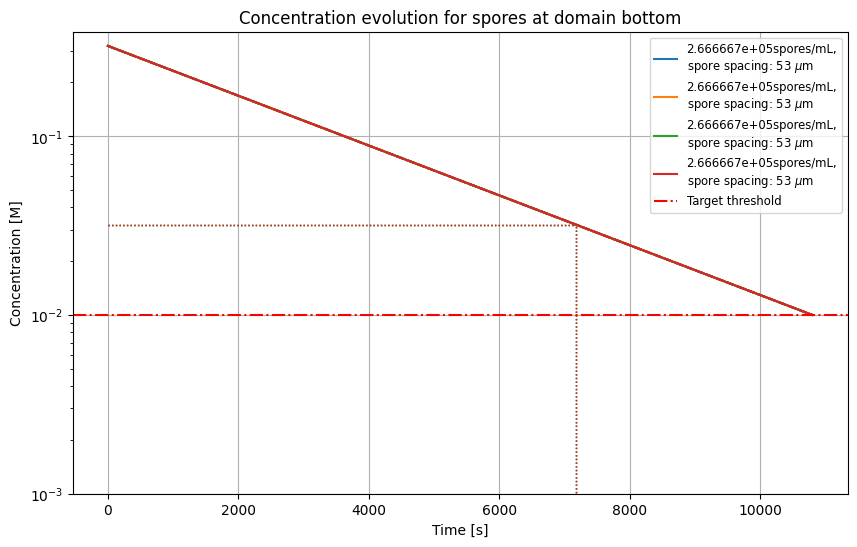

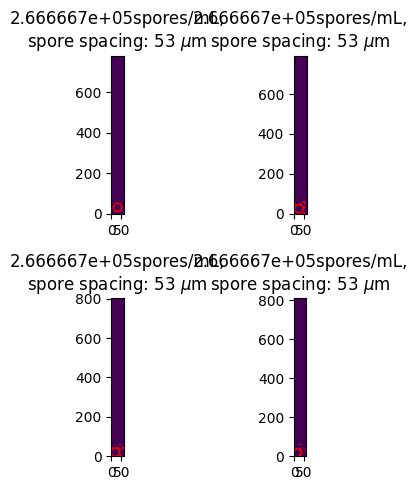

In [80]:
global_id = 'msb_250115'
pt.plot_experiment_results(global_id, logy=True, target_thresh=0.01, mark_spore=True, title='Concentration evolution for spores at domain bottom')

## References

[1] Ijadpanahsaravi, Maryam, L. Basten Snoek, Wieke R. Teertstra and Han A. B. Wösten. “The impact of inter- and intra-species spore density on germination of the food spoilage fungus Aspergillus niger.” International journal of food microbiology 410 (2023): 110495 .